In [1]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from graphviz import Source # for drawing decision tree
#from IPython.display import SVG # for drawing decision tree
import numpy as np
import pandas
import random
import math

rawData = pandas.read_csv("../../PANCANcoadread.csv", delimiter=',', skipinitialspace=True, warn_bad_lines=True, index_col=0) 
# change lows and neg to false, high to true
rawData.loc[rawData['class'] == 2.0, 'class'] = 0.0
rawData.loc[rawData['class'] == -1.0, 'class'] = 0.0
rawData = rawData.astype('bool') # convert to bools
foreground = rawData.loc[rawData['class'] == True].drop('class', axis = 1) # split into forground and backgorund
background = rawData.loc[rawData['class'] == False].drop('class', axis = 1)
# print(foreground.loc[foreground[rawData.columns[2]] == True])
# print(rawData)
rawData

,PRPF4B_GRCh38_6:4052741-4052741_Frame_Shift_Del_DEL_A_A_-,DNAJB6_GRCh38_7:157385842-157385842_Intron_DEL_T_T_-,DCAF12_GRCh38_9:34088276-34088276_3'UTR_DEL_A_A_-,RECK_GRCh38_9:36123176-36123176_3'UTR_DEL_T_T_-,ST8SIA6_GRCh38_10:17321322-17321322_Frame_Shift_Del_DEL_T_T_-,AADACL3_GRCh38_1:12725526-12725526_Frame_Shift_Del_DEL_T_T_-,TTC30B_GRCh38_2:177550639-177550639_3'UTR_DEL_T_T_-,CSF2RA_GRCh38_X:1288808-1288808_Silent_SNP_G_G_A,OMA1_GRCh38_1:58480868-58480868_3'UTR_DEL_T_T_-,MATN2_GRCh38_8:98007228-98007228_Splice_Site_SNP_G_G_A,...,SPG20_GRCh38_13:36335056-36335056_Missense_Mutation_SNP_C_C_T,MAGEC1_GRCh38_X:141908573-141908573_Missense_Mutation_SNP_C_C_T,SUSD5_GRCh38_3:33175019-33175019_Silent_SNP_G_G_A,APC_GRCh38_5:112839519-112839519_Nonsense_Mutation_SNP_G_T_T.1,AKR1B10_GRCh38_7:134537122-134537122_Silent_SNP_G_G_A,TRIM24_GRCh38_7:138584817-138584818_Frame_Shift_Ins_INS_-_-_A.1,HEMGN_GRCh38_9:97938188-97938188_5'UTR_SNP_G_G_T,CACNA1A_GRCh38_19:13303877-13303877_Missense_Mutation_SNP_G_G_A,CYLC1_GRCh38_X:83873973-83873973_Frame_Shift_Del_DEL_A_-_-,class
TCGA-AA-A02R-01,True,True,True,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
TCGA-AA-3488-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-AA-3844-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-AA-3678-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-CM-4746-01,True,True,True,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
TCGA-CM-5862-01,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-DM-A280-01,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-AA-3667-01,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
TCGA-D5-6537-01,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
TCGA-CM-6680-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


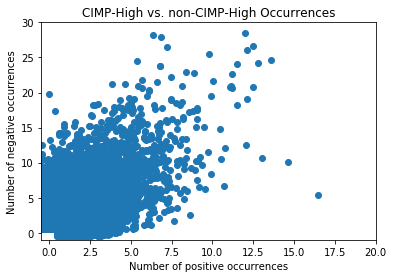

In [2]:
posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
negCounts = background.sum(axis=0)

plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
#plt.scatter(posCounts, negCounts, alpha=0.3)
plt.title("CIMP-High vs. non-CIMP-High Occurrences")
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)), alpha=0.3)
plt.xlabel("Number of positive occurrences")
plt.ylabel("Number of negative occurrences")
plt.ylim(-1,30)
plt.xlim(-0.5,20)
plt.savefig('figure1.png')

In [ ]:
n = len(foreground.columns)
posCoOccur = [0 for x in range(n*n)]
negCoOccur = [0 for x in range(n*n)]

for row in foreground.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    posCoOccur[first*n+second] += 1                      

for row in background.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    negCoOccur[first*n+second] += 1

# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
plt.scatter(posCoOccur, negCoOccur, alpha=0.2)
#plt.scatter(list(map(lambda x: x + random.random() -.5, posCoOccur)), list(map(lambda x: x + random.random() -.5, negCoOccur)), alpha=0.01)
plt.title("CIMP-High vs. non-CIMP-High Pair Occurrences (features with 3 or more CIMP-High)")
plt.xlabel("Number of positive co-occurrences")
plt.ylabel("Number of negative co-occurrences")
plt.ylim(-1,20)
plt.xlim(-0.5,15)
plt.savefig('figure2.png')

In [ ]:
'''print(rawData.columns[math.floor(9999/len(rawData.columns))], " and ", rawData.columns[9999%len(rawData.columns)]) # code for printing pairs of co-ocurring motifs

never = []
neverMotifNames = []
mixed = []
mixedMotifNames = []
right = []
rightMotifNames = []
bottom = []
bottomMotifNames = []
ratio = []
ratioMotifNames = []
lasso = []
lassoMotifNames = []
welchList = []
welchListMotifNames = []

posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
print(max(posCounts))
negCounts = background.sum(axis=0)
for col in range(len(posCounts)):
    if negCounts[col] == 0 and posCounts[col] == 0:
        neverMotifNames.append(rawData.columns[col])
    else:
        if posCounts[col] >= max(posCounts) - 1:
            rightMotifNames.append(rawData.columns[col])
        if negCounts[col] < 3:
            bottomMotifNames.append(rawData.columns[col])
        if posCounts[col] > 0 and negCounts[col] > 0:
            mixedMotifNames.append(rawData.columns[col])
        if (posCounts[col] / max(posCounts)) / (1+negCounts[col]/max(negCounts)) > .5:
            ratioMotifNames.append(rawData.columns[col])
        if posCounts[col] >= 9 and negCounts[col] <= 60:
            welchListMotifNames.append(rawData.columns[col])

# calculate and list metrics for all motifs with foreground >= 9 & background <= 20
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative|motif name')

selected = rightMotifNames
netTP = 0
netFP = 0
netTN = 0
netFN = 0
for motif in selected:
    tp = foreground.loc[foreground[motif] == True].shape[0]
    fn = foreground.loc[foreground[motif] == False].shape[0]
    tn = background.loc[background[motif] == False].shape[0]
    fp = background.loc[background[motif] == True].shape[0]
    netTP += tp
    netFP += fp
    netTN += tn
    netFN += fn
    if(tn+fp == 0):
        print(tp,"|", fp,"|", tn,"|", fn,"|",float(tp+tn)/(tp+tn+fp+fn),"|",tp/float(tp+fn),"|", " NA ","|", tp+fn,"|",motif)
    else:
        print(tp,"|", fp,"|", tn,"|", fn,"|",float(tp+tn)/(tp+tn+fp+fn),"|",tp/float(tp+fn),"|",tn/float(tn+fp),"|", tp+fn,"|",motif)

print("AVERAGE / SUM METRICS:")
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative')
if(netTN+netFP == 0):
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",(netTP+netTN)/(netTP+netTN+netFP+netFN),"|",netTP/(netTP+netFN),"|"," NA ","|", netTP+netFN)
else:
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",(netTP+netTN)/(netTP+netTN+netFP+netFN),"|",netTP/(netTP+netFN),"|",netTN/(netTN+netFP),"|", netTP+netFN)

truePositives = foreground.sum(axis=0)
falsePositives = background.sum(axis=0)

accuracyHeatData = []
sensitivityHeatData = []
specificityHeatData = []
for maxBackground in range(max(negCounts)):
    accuracyHeatDataRow = []
    sensitivityHeatDataRow = []
    specificityHeatDataRow = []
    for minForeground in range(max(posCounts)):
        motifList = []
        for motif in range(len(posCounts)):
            if minForeground <= posCounts[motif] and maxBackground >= negCounts[motif]:
                motifList.append(rawData.columns[motif]) #add name of motif
        if len(motifList) > 0:
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            for motif in motifList:
                tp += truePositives[motif]
                fn += len(foreground) - truePositives[motif] # number of foreground - tp
                fp += falsePositives[motif]
                tn += len(background) - falsePositives[motif] # number of background - fp
            accuracyHeatDataRow.append(float(tp+tn)/float(tp+tn+fp+fn))
            sensitivityHeatDataRow.append(float(tp)/float(tp+fn))
            specificityHeatDataRow.append(float(tn)/float(tn+fp))
        else:
            accuracyHeatDataRow.append(0)
            sensitivityHeatDataRow.append(0)
            specificityHeatDataRow.append(0)
    accuracyHeatData.append(accuracyHeatDataRow)
    sensitivityHeatData.append(sensitivityHeatDataRow)
    specificityHeatData.append(specificityHeatDataRow)

img = plt.imshow(np.array(accuracyHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("Accuracy of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.ylim(0,132)
plt.xlim(-0.5,12.5)
plt.savefig('figure3.png')'''

In [ ]:
#img = plt.imshow(np.array(sensitivityHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("sensitivity of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.ylim(0,132)
plt.xlim(-0.5,12.5)
plt.savefig('figure4.png')
plt.clf()
img = plt.imshow(np.array(specificityHeatData),interpolation='nearest')

plt.colorbar() # make a color bar
plt.axis('auto')
plt.gca().invert_yaxis()
plt.title("specificity of majority vote with constraints x and y")
plt.xlabel("Minimum number of Positive occurrences")
plt.ylabel("Maximum number of negative occurrences")
plt.ylim(0,132)
plt.xlim(-0.5,12.5)
plt.savefig('figure5.png')